In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [2]:
#filename reading
#filename = 'numbers_for_checking.txt'
##filename with own mw23 clustering
filename ='numbers_with_own_clusteringmw23.txt'
df = pd.read_csv(filename,sep='\t',header=None)
df.columns = ["datatype","targettype","RunID","energy","incoming ions","delta Z","iso_corr","geo_corr"]
print("this is df :")
print(df)
file_diagonal_integral_charge = "combinded_values_for_diagonal_integral.txt"
file_charge_check = "combined_charge_check_file_no_time_cut.txt"
df_charge_check = pd.read_csv(file_charge_check,sep='\t',header=None)
df_charge_check.columns = ["datatype","targettype","RunID","energy","incoming ions","survived_ions","charge_carbon_x_zero","charge_carbon_y_zero","charge_x_or_y_zero"]

df_diagonal_integral = pd.read_csv(file_diagonal_integral_charge,sep='\t',header=None)
df_diagonal_integral.columns = ["datatype","targettype","RunID","energy","integral_charge","chi2/ndf"]
print("this is df_diagonal_integral")
print(df_diagonal_integral)
print("this is df")
print(df)
print("this is result")
temp_result = df.merge(df_diagonal_integral,on=["RunID","datatype","targettype","energy"],how="inner")
result = temp_result.merge(df_charge_check,on=["RunID","datatype","targettype","energy","incoming ions"],how="inner")

result["delta Z integral"] = 1- (result["integral_charge"]/result["incoming ions"])
result["charge_carbon_x_zero"] = result["charge_carbon_x_zero"]/result["incoming ions"]
result["charge_carbon_y_zero"] = result["charge_carbon_y_zero"]/result["incoming ions"]
result["charge_x_or_y_zero"] = result["charge_x_or_y_zero"]/result["incoming ions"]
print(result)
print(result["delta Z integral"])
print("helllllllllllllllllllllllooooooooooooo")
print(result["charge_carbon_x_zero"])

this is df :
  datatype targettype      RunID  energy  incoming ions   delta Z  iso_corr  \
0      exp     c_2198  0183_0001     400         657424  0.155960  0.987649   
1      exp     c_2198  0103_0001     550         437311  0.156934  0.984340   
2      exp     c_2198  0130_0001     650         531690  0.159631  0.984813   
3      exp     c_2198  0170_0001     800         480539  0.160670  0.987349   
4      exp      empty  0187_0001     400         575624  0.019770  0.997632   
5      exp      empty  0096_0001     550         454455  0.020174  0.997752   
6      exp      empty  0124_0001     650         523267  0.020255  0.997709   
7      exp      empty  0173_0001     800         396093  0.020202  0.998275   

   geo_corr  
0   1.00342  
1   1.00191  
2   1.00065  
3   1.00069  
4   1.00065  
5   1.00022  
6   1.00010  
7   1.00012  
this is df_diagonal_integral
  datatype targettype      RunID  energy  integral_charge  chi2/ndf
0      exp     c_2198  0183_0001     400           5

In [3]:
target_deltaZ = df.loc[df["targettype"] == 'c_2198']

In [4]:
empty_deltaZ = df.loc[df["targettype"] == 'empty']

energy_vals = ["400","550","650","800"]
rel_iso_corr_vals = []
for ene in energy_vals:
    iso_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["iso_corr"]
    print(iso_corr_target)
    iso_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["iso_corr"]
    print(iso_corr_empty)
    rel_iso_corr = float(iso_corr_target)/float(iso_corr_empty)
    print("this is rel iso corr:\t",rel_iso_corr)
    rel_iso_corr_vals.append(rel_iso_corr)
#print(energy_vals)
print(rel_iso_corr_vals)
    
    

0    0.987649
Name: iso_corr, dtype: float64
4    0.997632
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9899933041442135
1    0.98434
Name: iso_corr, dtype: float64
5    0.997752
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9865577818936969
2    0.984813
Name: iso_corr, dtype: float64
6    0.997709
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9870743874215827
3    0.987349
Name: iso_corr, dtype: float64
7    0.998275
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9890551200821417
[0.9899933041442135, 0.9865577818936969, 0.9870743874215827, 0.9890551200821417]


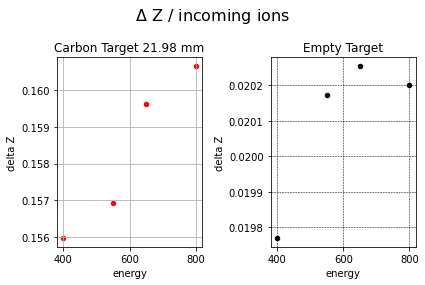

In [5]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'delta Z', color='red',marker= "o",alpha = 1,title="Carbon Target 21.98 mm")
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[1],x='energy',y = 'delta Z', color='black',marker= "o",alpha = 1,title="Empty Target")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[0].grid()
ax[1].grid()
fig.suptitle(r'$\Delta$ Z / incoming ions',fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("delta_z.png",dpi=300)

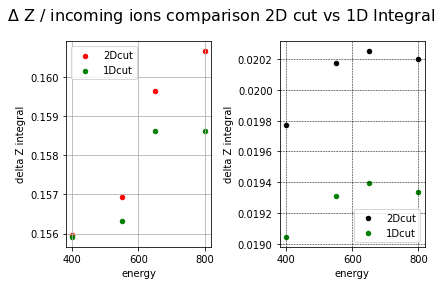

In [6]:
target_deltaZ_integral = result.loc[result["targettype"] == 'c_2198']
empty_deltaZ_integral = result.loc[result["targettype"] == 'empty']
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'delta Z', color='red',marker= "o",alpha = 1,label="2Dcut")
target_deltaZ_integral.plot(kind='scatter',ax=ax[0],x='energy',y = 'delta Z integral', color='green',marker= "o",alpha = 1,label="1Dcut")

plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[1],x='energy',y = 'delta Z', color='black',marker= "o",alpha = 1,label="2Dcut")
empty_deltaZ_integral.plot(kind='scatter',ax=ax[1],x='energy',y = 'delta Z integral', color='green',marker= "o",alpha = 1,label="1Dcut")

#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[0].grid()
ax[1].grid()
fig.suptitle(r'$\Delta$ Z / incoming ions comparison 2D cut vs 1D Integral',fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("delta_z.png",dpi=300)

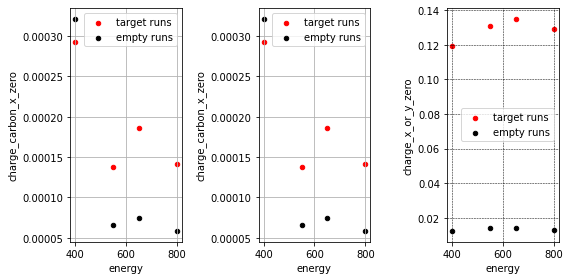

In [7]:
#plot how often you have zero charge on the first 8 anodes, last 8 anodes or both of them
fig, ax = plt.subplots(1, 3,figsize=(8, 4))
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ_integral.plot(kind='scatter',ax=ax[0],x='energy',y = "charge_carbon_x_zero", color='red',marker= "o",alpha = 1,label="target runs")
empty_deltaZ_integral.plot(kind='scatter',ax=ax[0],x='energy',y = "charge_carbon_x_zero", color='black',marker= "o",alpha = 1,label="empty runs")
target_deltaZ_integral.plot(kind='scatter',ax=ax[1],x='energy',y = "charge_carbon_x_zero", color='red',marker= "o",alpha = 1,label="target runs")
empty_deltaZ_integral.plot(kind='scatter',ax=ax[1],x='energy',y = "charge_carbon_x_zero", color='black',marker= "o",alpha = 1,label="empty runs")
target_deltaZ_integral.plot(kind='scatter',ax=ax[2],x='energy',y = "charge_x_or_y_zero", color='red',marker= "o",alpha = 1,label="target runs")
empty_deltaZ_integral.plot(kind='scatter',ax=ax[2],x='energy',y = "charge_x_or_y_zero", color='black',marker= "o",alpha = 1,label="empty runs")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.tight_layout()

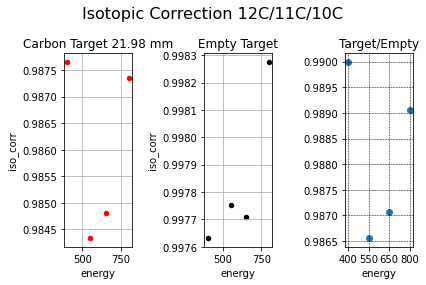

In [8]:
fig, ax = plt.subplots(1, 3)
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,title="Carbon Target 21.98 mm")
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,title="Empty Target")
#ax[2].plot(kind='scatter',x=energy_vals,y=rel_iso_corr_vals)
ax[2].scatter(energy_vals,rel_iso_corr_vals,label="target/empty")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[0].grid()
ax[1].grid()
ax[2].set_title("Target/Empty")
ax[2].set_xlabel("energy")
fig.suptitle("Isotopic Correction 12C/11C/10C",fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("iso_corr.png",dpi=300)

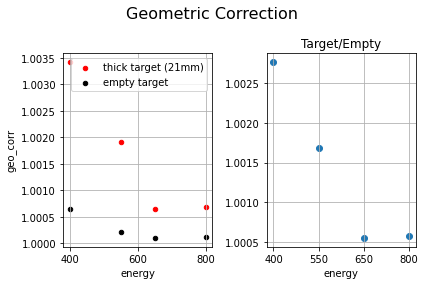

In [9]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
rel_geo_corr = []
for ene in energy_vals:
    geo_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["geo_corr"]
    geo_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["geo_corr"]
    rel_geo_corr_tmp = float(geo_corr_target)/float(geo_corr_empty)
    rel_geo_corr.append(rel_geo_corr_tmp)
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'geo_corr', color='red',marker= "o",alpha = 1,label="thick target (21mm)")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'geo_corr', color='black',marker= "o",alpha = 1,label="empty target")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[1].scatter(energy_vals,rel_geo_corr,label="hello")
ax[0].grid()
ax[1].grid()
ax[1].set_title("Target/Empty")
ax[1].set_xlabel("energy")
fig.suptitle("Geometric Correction",fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("geo_corr.png",dpi=300)

In [10]:
#df_div = float(target_deltaZ["geo_corr"])/float(empty_deltaZ["geo_corr"])
#df_div = target_deltaZ["geo_corr"].div((empty_deltaZ["geo_corr"]))
#print(target_deltaZ)
df_target = df.loc[(df["targettype"] == "c_2198")]["geo_corr"]
df_empty = df.loc[(df["targettype"] == "empty")]["geo_corr"]
for ene in energy_vals:
    geo_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["geo_corr"]
    geo_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["geo_corr"]
    print("this is geo_corr target:\t",geo_corr_target)
    print("this is geo_corr_empty:\t",geo_corr_empty)
    rel_geo_corr = float(geo_corr_target)/float(geo_corr_empty)
    print("rel_geo_corr:\t",rel_geo_corr)


this is geo_corr target:	 0    1.00342
Name: geo_corr, dtype: float64
this is geo_corr_empty:	 4    1.00065
Name: geo_corr, dtype: float64
rel_geo_corr:	 1.0027682006695646
this is geo_corr target:	 1    1.00191
Name: geo_corr, dtype: float64
this is geo_corr_empty:	 5    1.00022
Name: geo_corr, dtype: float64
rel_geo_corr:	 1.001689628281778
this is geo_corr target:	 2    1.00065
Name: geo_corr, dtype: float64
this is geo_corr_empty:	 6    1.0001
Name: geo_corr, dtype: float64
rel_geo_corr:	 1.0005499450054995
this is geo_corr target:	 3    1.00069
Name: geo_corr, dtype: float64
this is geo_corr_empty:	 7    1.00012
Name: geo_corr, dtype: float64
rel_geo_corr:	 1.0005699316082068


0.9899933041442135
reaction cross section:	 770.8878031816251
charge changing for diagonal 1d cut 738.3645982646032
0.9865577818936969
reaction cross section:	 796.9070296570799
charge changing for diagonal 1d cut 739.3775160909822
0.9870743874215827
reaction cross section:	 815.2631447623072
charge changing for diagonal 1d cut 752.4112496547899
0.9890551200821417
reaction cross section:	 811.6597521620199
charge changing for diagonal 1d cut 752.733544246948


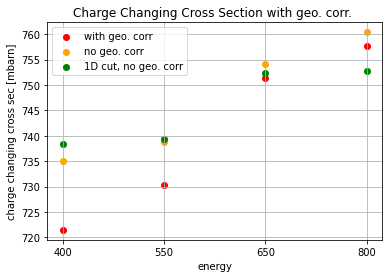

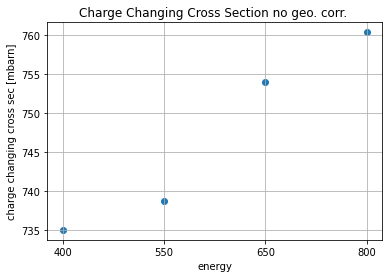

In [23]:
new_density = 1.851
T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
factor = (1./T_2198)*(pow(10,27))
df['delta Z'] = df['delta Z'].astype(float)
df['geo_corr'] = df['geo_corr'].astype(float)
df['iso_corr'] = df['iso_corr'].astype(float)
result["delta_z_1d_cut"] = (result["integral_charge"]/result["incoming ions"])
charge_changing_vals = []
charge_changing_vals_1dcut  = []
fake_charge_changing = []
charge_changing_no_geo = []
for ene in energy_vals:
    #print ("hello",(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['delta Z'])/(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['delta Z']))
    dz = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['delta Z']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['delta Z']))
    d_iso = float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['iso_corr'])/float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['iso_corr'])
    d_geo =  float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['geo_corr'])/float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['geo_corr'])
    print (d_iso)
    ##now check charge changing cross section when using 1d cut of diagonal
    dz_diagonal = (float(result.loc[(result["targettype"] == "c_2198") & (result["energy"] == float(ene))]['delta_z_1d_cut']))/(float(result.loc[(result["targettype"] == "empty") & (result["energy"] == float(ene))]['delta_z_1d_cut']))
    cs = factor*(-math.log(dz)-math.log(d_iso)-math.log(d_geo))
    cc = factor*(-math.log(dz)-math.log(d_geo))
    fake_cs = factor*(-math.log(dz))
    cc_diagonal_1d_cut = factor*(-math.log(dz_diagonal))
    print("reaction cross section:\t",cs)
    #print("charge changing cross section:\t",cc)
    #print("fake cross section:\t",fake_cs)
    charge_changing_vals.append(cc)
    charge_changing_no_geo.append(fake_cs)
    charge_changing_vals_1dcut.append(cc_diagonal_1d_cut)
    print("charge changing for diagonal 1d cut",cc_diagonal_1d_cut)

fig, ax = plt.subplots()
ax.scatter(energy_vals,charge_changing_vals,label="with geo. corr",color='red')
ax.scatter(energy_vals,charge_changing_no_geo,label="no geo. corr",color ='orange')
ax.scatter(energy_vals,charge_changing_vals_1dcut,label="1D cut, no geo. corr",color ='green')
ax.grid()
ax.set_title("Charge Changing Cross Section with geo. corr. ")
ax.set_xlabel("energy")
ax.set_ylabel("charge changing cross sec [mbarn]")
plt.legend()
#plt.show()
plt.savefig("geo_charge_changing_cross_section.png",dpi=300)

fig, ax = plt.subplots()
ax.scatter(energy_vals,charge_changing_no_geo,label="hello")
ax.grid()
ax.set_title("Charge Changing Cross Section no geo. corr. ")
ax.set_xlabel("energy")
ax.set_ylabel("charge changing cross sec [mbarn]")
#plt.show()
plt.savefig("no_geo_charge_changing_cross_section.png",dpi=300)
    
    

In [12]:
#differnt methods to make the isotopic correction
file_plain = "./iso_corr_numbers/combined_plain.txt"
file_plain_one_sigma = "./iso_corr_numbers/combined_plain_one_sigma.txt"
file_mw12_cut = "./iso_corr_numbers/combined_mw12_cut.txt"
file_mw12_cut_one_sigma = "./iso_corr_numbers/combined_mw12_cut_one_sigma.txt"
file_own_cluster = "./iso_corr_numbers/combined_own_cluster.txt"
file_own_cluster_one_sigma = "./iso_corr_numbers/combined_own_cluster_one_sigma.txt"
df_plain = pd.read_csv(file_plain,sep='\t',header=None)
df_plain_one_sigma = pd.read_csv(file_plain_one_sigma,sep='\t',header=None)
df_mw12_cut = pd.read_csv(file_mw12_cut,sep='\t',header=None)
df_mw12_cut_one_sigma = pd.read_csv(file_mw12_cut_one_sigma,sep='\t',header=None)
df_own_cluster = pd.read_csv(file_own_cluster,sep='\t',header=None)
df_own_cluster_one_sigma = pd.read_csv(file_own_cluster_one_sigma,sep='\t',header=None)

df_plain.columns = ["datatype","targettype","RunID","energy","iso_corr"]
df_plain_one_sigma.columns = ["datatype","targettype","RunID","energy","iso_corr"]
df_mw12_cut.columns = ["datatype","targettype","RunID","energy","iso_corr"]
df_mw12_cut_one_sigma.columns = ["datatype","targettype","RunID","energy","iso_corr"]
df_own_cluster.columns = ["datatype","targettype","RunID","energy","iso_corr"]
df_own_cluster_one_sigma.columns = ["datatype","targettype","RunID","energy","iso_corr"]


In [13]:
target_iso_plain = df_plain.loc[df_plain["targettype"] == 'c_2198']
target_iso_plain_one_sigma = df_plain_one_sigma.loc[df_plain_one_sigma["targettype"] == 'c_2198']
target_iso_mw12_cut = df_mw12_cut.loc[df_mw12_cut["targettype"] == 'c_2198']
target_iso_mw12_cut_one_sigma = df_mw12_cut_one_sigma.loc[df_mw12_cut_one_sigma["targettype"] == 'c_2198']
target_iso_cluster = df_own_cluster.loc[df_own_cluster["targettype"] == 'c_2198']
target_iso_cluster_one_sigma = df_own_cluster_one_sigma.loc[df_own_cluster_one_sigma["targettype"] == 'c_2198']

empty_iso_plain = df_plain.loc[df_plain["targettype"] == 'empty']
empty_iso_plain_one_sigma = df_plain_one_sigma.loc[df_plain_one_sigma["targettype"] == 'empty']
empty_iso_mw12_cut = df_mw12_cut.loc[df_mw12_cut["targettype"] == 'empty']
empty_iso_mw12_cut_one_sigma = df_mw12_cut_one_sigma.loc[df_mw12_cut_one_sigma["targettype"] == 'empty']
empty_iso_cluster = df_own_cluster.loc[df_own_cluster["targettype"] == 'empty']
empty_iso_cluster_one_sigma = df_own_cluster_one_sigma.loc[df_own_cluster_one_sigma["targettype"] == 'empty']

#plot now those things
#print(target_iso_cluster["iso_corr"])
#print(empty_iso_cluster["iso_corr"])
#print(target_iso_mw12_cut["iso_corr"])

print(target_iso_cluster_one_sigma["iso_corr"])
print(empty_iso_cluster_one_sigma["iso_corr"])

0    0.011342
1    0.016010
2    0.015352
3    0.013152
Name: iso_corr, dtype: float64
4    0.002272
5    0.002163
6    0.002222
7    0.001589
Name: iso_corr, dtype: float64


iso corr no cut target:
0.0142025
0.016436900000000004
0.0173653
0.0148451
iso corr no cut empty:
0.00283955
0.00445572
0.00481358
0.00446713
iso corr mw12 cut target:
0.012996899999999999
0.0150435
0.0150429
0.0123144
iso corr mw12 cut empty:
0.00214039
0.00328888
0.00306742
0.00236267
iso corr own cluster target:
0.0123382
0.0156923
0.0152149
0.012676399999999999
iso corr own cluster empty:
0.0023771
0.00226719
0.00230079
0.00173895
iso corr no cut target one sigma:
0.012920500000000001
0.0169129
0.0172636
0.0150529
iso corr no cut empty one sigma:
0.00201894
0.00445332
0.00489869
0.00422685
iso corr mw12 cut target one sigma:
0.0117048
0.0155149
0.015116
0.0122829
iso corr mw12 cut empty one sigma:
0.00209063
0.00318259
0.00305548
0.00225849
iso corr own cluster target one_sigma:
0.0113423
0.0160099
0.0153525
0.013152
iso corr own cluster empty one sigma:
0.00227156
0.00216312
0.00222195
0.00158932


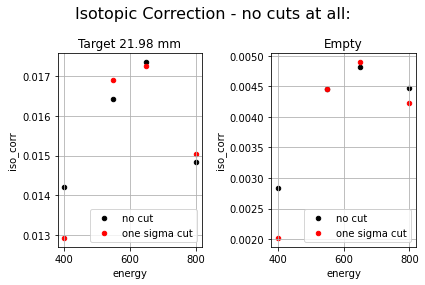

In [14]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
target_iso_plain.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,label="no cut")
target_iso_plain_one_sigma.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,label="one sigma cut")
empty_iso_plain.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,label="no cut")
empty_iso_plain_one_sigma.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,label="one sigma cut")
ax[0].set_title("Target 21.98 mm")
ax[1].set_title("Empty")
ax[0].grid()
ax[1].grid()
fig.suptitle("Isotopic Correction - no cuts at all:",fontsize=16)
plt.tight_layout()
plt.savefig("iso_corr_no_cut.png",dpi=300)
list_plain_iso_corr_target = (target_iso_plain["iso_corr"]).to_list()
list_plain_iso_corr_one_sigma_target = (target_iso_plain_one_sigma["iso_corr"]).to_list()
list_plain_iso_corr_empty = (empty_iso_plain["iso_corr"]).to_list()
list_plain_iso_corr_one_sigma_empty = (empty_iso_plain_one_sigma["iso_corr"]).to_list()
list_mw12_cut_target = (target_iso_mw12_cut["iso_corr"]).to_list()
list_mw12_cut_one_sigma_target = (target_iso_mw12_cut_one_sigma["iso_corr"]).to_list()
list_mw12_cut_empty = (empty_iso_mw12_cut["iso_corr"]).to_list()
list_mw12_cut_one_sigma_empty = (empty_iso_mw12_cut_one_sigma["iso_corr"]).to_list()
list_own_cluster_target = (target_iso_cluster["iso_corr"]).to_list()
list_own_cluster_one_sigma_target = (target_iso_cluster_one_sigma["iso_corr"]).to_list()
list_own_cluster_empty = (empty_iso_cluster["iso_corr"]).to_list()
list_own_cluster_one_sigma_empty = (empty_iso_cluster_one_sigma["iso_corr"]).to_list()
print("iso corr no cut target:")
print(*list_plain_iso_corr_target,sep = "\n")

print("iso corr no cut empty:")
print(*list_plain_iso_corr_empty,sep = "\n")


print("iso corr mw12 cut target:")
print(*list_mw12_cut_target,sep = "\n")

print("iso corr mw12 cut empty:")
print(*list_mw12_cut_empty,sep = "\n")

print("iso corr own cluster target:")
print(*list_own_cluster_target,sep = "\n")

print("iso corr own cluster empty:")
print(*list_own_cluster_empty,sep = "\n")



print("iso corr no cut target one sigma:")
print(*list_plain_iso_corr_one_sigma_target,sep = "\n")

print("iso corr no cut empty one sigma:")
print(*list_plain_iso_corr_one_sigma_empty,sep = "\n")


print("iso corr mw12 cut target one sigma:")
print(*list_mw12_cut_one_sigma_target,sep = "\n")

print("iso corr mw12 cut empty one sigma:")
print(*list_mw12_cut_one_sigma_empty,sep = "\n")

print("iso corr own cluster target one_sigma:")
print(*list_own_cluster_one_sigma_target,sep = "\n")

print("iso corr own cluster empty one sigma:")
print(*list_own_cluster_one_sigma_empty,sep = "\n")

#plt.plot(target_iso_plain["energy"],(list_plain_iso_corr_target/list_plain_iso_corr_empty))


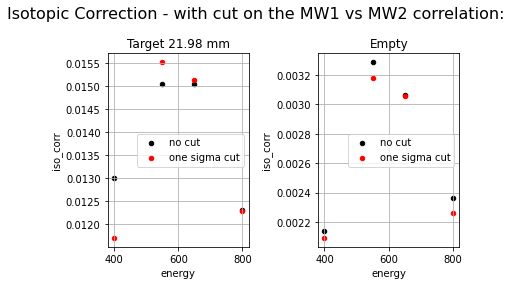

In [15]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
target_iso_mw12_cut.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,label="no cut")
target_iso_mw12_cut_one_sigma.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,label="one sigma cut")
empty_iso_mw12_cut.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,label="no cut")
empty_iso_mw12_cut_one_sigma.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,label="one sigma cut")
ax[0].set_title("Target 21.98 mm")
ax[1].set_title("Empty")
ax[0].grid()
ax[1].grid()
fig.suptitle("Isotopic Correction - with cut on the MW1 vs MW2 correlation:",fontsize=16)
plt.tight_layout()
plt.savefig("iso_corr_mw12_cut.png",dpi=300)

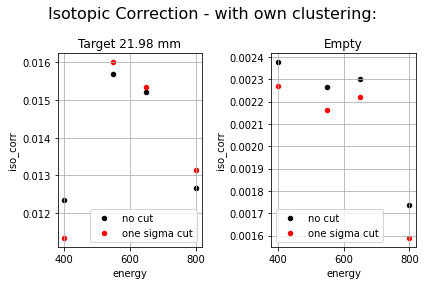

In [16]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
target_iso_cluster.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,label="no cut")
target_iso_cluster_one_sigma.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,label="one sigma cut")
empty_iso_cluster.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,label="no cut")
empty_iso_cluster_one_sigma.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,label="one sigma cut")
ax[0].set_title("Target 21.98 mm")
ax[1].set_title("Empty")
ax[0].grid()
ax[1].grid()
fig.suptitle("Isotopic Correction - with own clustering:",fontsize=16)
plt.tight_layout()
plt.savefig("iso_corr_own_clustering.png",dpi=300)

  datatype targettype      RunID  energy  incoming ions   delta Z  iso_corr  \
0      exp     c_2198  0183_0001     400         657424  0.155960  0.987649   
1      exp     c_2198  0103_0001     550         437311  0.156934  0.984340   
2      exp     c_2198  0130_0001     650         531690  0.159631  0.984813   
3      exp     c_2198  0170_0001     800         480539  0.160670  0.987349   
4      exp      empty  0187_0001     400         575624  0.019770  0.997632   
5      exp      empty  0096_0001     550         454455  0.020174  0.997752   
6      exp      empty  0124_0001     650         523267  0.020255  0.997709   
7      exp      empty  0173_0001     800         396093  0.020202  0.998275   

   geo_corr  integral_charge  chi2/ndf  survived_ions  charge_carbon_x_zero  \
0   1.00342           554930  2.876040         554892              0.000292   
1   1.00191           368955  1.594820         368682              0.000137   
2   1.00065           447355  1.993160         4468

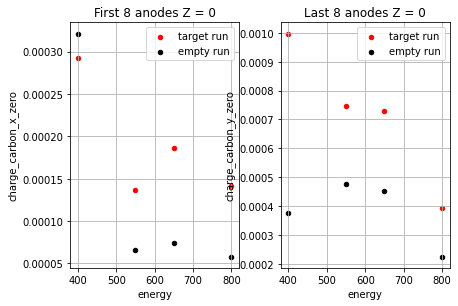

In [17]:
target_result = result.loc[result["targettype"] == 'c_2198']
print(result)
print(result["charge_carbon_x_zero"])
empty_result = result.loc[result["targettype"] == 'empty']
fig, ax = plt.subplots(1,2)
fig.tight_layout()
target_result.plot(kind='scatter',ax=ax[0],x='energy',y = 'charge_carbon_x_zero', color='red',marker= "o",alpha = 1,label="target run")
empty_result.plot(kind='scatter',ax=ax[0],x='energy',y = 'charge_carbon_x_zero', color='black',marker= "o",alpha = 1,label="empty run")

target_result.plot(kind='scatter',ax=ax[1],x='energy',y = 'charge_carbon_y_zero', color='red',marker= "o",alpha = 1,label="target run")
empty_result.plot(kind='scatter',ax=ax[1],x='energy',y = 'charge_carbon_y_zero', color='black',marker= "o",alpha = 1,label="empty run")
ax[0].set_title("First 8 anodes Z = 0")
ax[1].set_title("Last 8 anodes Z = 0")
ax[0].grid()
ax[1].grid()
                  

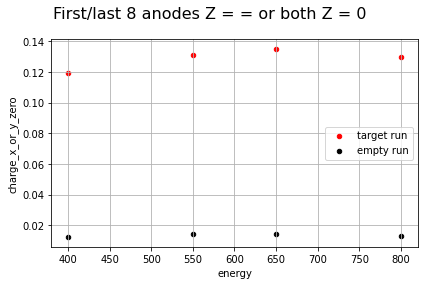

In [18]:
fig, ax = plt.subplots()
#fig.tight_layout()
target_result.plot(kind='scatter',ax=ax,x='energy',y = 'charge_x_or_y_zero', color='red',marker= "o",alpha = 1,label="target run")
empty_result.plot(kind='scatter',ax=ax,x='energy',y = 'charge_x_or_y_zero', color='black',marker= "o",alpha = 1,label="empty run")
ax.grid()

fig.suptitle("First/last 8 anodes Z = = or both Z = 0 ",fontsize=16)
plt.tight_layout()

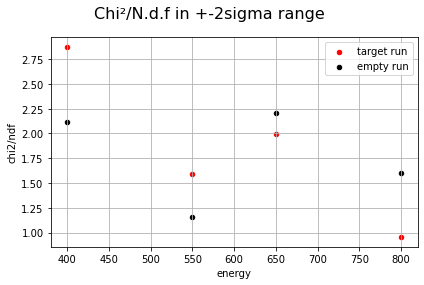

In [19]:
fig, ax = plt.subplots()
target_result.plot(kind='scatter',ax=ax,x='energy',y = 'chi2/ndf', color='red',marker= "o",alpha = 1,label="target run")
empty_result.plot(kind='scatter',ax=ax,x='energy',y = 'chi2/ndf', color='black',marker= "o",alpha = 1,label="empty run")
ax.grid()

fig.suptitle("Chi²/N.d.f in +-2sigma range ",fontsize=16)
plt.tight_layout()
plt.savefig("chi2_ndf_fit.png",dpi=300)